# Integradores

Como vimos después de Euler conseguimos un método llamado metodos Jacobianos. Determinado por la siguiente fórmula:

$$ y'(x) = f(x, y) $$

$$ y_{n+1} = y_{n} + h f(x,y) + \frac{h²}{2} \left( \frac{\partial f}{\partial x} + \frac{\partial f}{\partial y} f \right) $$

Sin embargo necesita de más información, el Jacobiano de la ecuación diferencial.

### Pongamos manos a la obra para encontrar una forma de integrar más básica.

Busquemos usar la aproximación a segundo orden, como vimos en clase:

$$
\vec y_{n+1} = \vec y_n + h \vec f + \frac{1}{2}h² \left( \frac{\partial \vec f}{\partial x} + \mathbb{J}\vec f \right)
$$

Donde $ f $ es $ f(x_n, \vec y_n) $, $ \mathbb{J} $ es el Jacobiano de $ f $ evaluado en $ (x_n, \vec y_n) $.

In [2]:
from pylab import *
import numpy
%matplotlib inline

/home/maunio/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


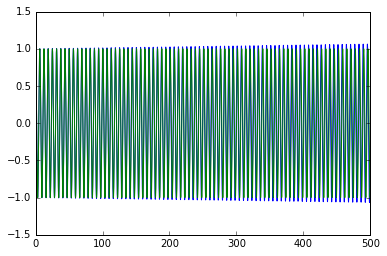

In [3]:
def integra2(ecuacion, jacobiano, p_ini, x, h=0.1):
    #f = ecuacion(p_ini)
    #df = jacobiano(p_ini)[0]
    #Jac = jacobiano(p_ini)[0]
    tiempos = arange(x[0], x[1] + h, h)
    sol = zeros((len(tiempos), len(p_ini)))
    sol[0, :] = p_ini
    for i in xrange(len(tiempos)-1):
        f = ecuacion(sol[i,:], tiempos[i])
        df, jac= jacobiano(sol[i,:], tiempos[i])
        sol[i+1,:] = sol[i,:] + (h*f) + (0.5*h*h*(df + dot(jac, f)))
    #jn1 = yn + (h*f) + (0.5*h*h*(jac[0] + dot(jac[1], f)))
    return tiempos, sol

def prueba(y,t):
    return array([y[1], -y[0]])

def d_prueba(y,t):
    return array([0,0]), array([[0,1], [-1,0]])

t,y= integra2(prueba, d_prueba, [1,0], [0,500], 0.1)
plot(t, y[:,0], t, cos(t))
#plot(y[:,0], y[:,1])

In [4]:
ecuacion = 0
print ecuacion(4,5)

TypeError: 'int' object is not callable

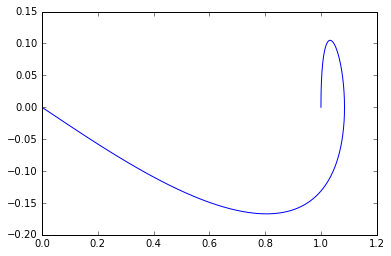

In [7]:
def p(y,t):
    return array([y[1], -2*y[1] - 0.5*sin(y[0]) + exp(-t)])

def d_p(y,t):
    return array([0, -exp(-t)]), array([[0,1],[-0.5*cos(y[0]), -2]])

t,y = integra2(p, d_p, [1,0], [0,100], 0.01)
#plot(t, y[:,0])
plot(y[:,0], y[:,1])

In [10]:
def RK_midP(ecuacion, p_ini, x, h=0.1):
    tiempos = arange(x[0], x[1] + h, h)
    sol = zeros((len(tiempos), len(p_ini)))
    sol[0, :] = p_ini
    for i in xrange(len(tiempos)-1):
        k = h * ecuacion(sol[i,:], tiempos[i])
        f = ecuacion(sol[i,:] + 0.5*k, tiempos[i] + 0.5*h)
        sol[i+1,:] = sol[i,:] + (h*f)
    return tiempos, sol
    

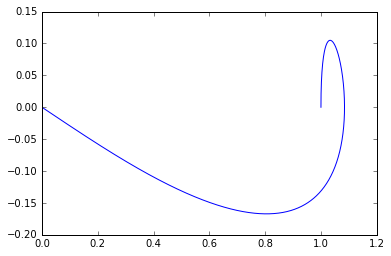

In [11]:
def p(y,t):
    return array([y[1], -2*y[1] - 0.5*sin(y[0]) + exp(-t)])

def d_p(y,t):
    return array([0, -exp(-t)]), array([[0,1],[-0.5*cos(y[0]), -2]])

t,y = RK_midP(p, [1,0], [0,100], 0.01)
#plot(t, y[:,0])
plot(y[:,0], y[:,1])